**William Sanjaya Kesuna - 0706022210040**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [12]:
data = 'https://raw.githubusercontent.com/WilliamKesuma/Data-Mining/refs/heads/main/bank.csv'
df = pd.read_csv(data, delimiter =";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [13]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
               age       balance          day     duration     campaign  \
count  4521.000000 

In [14]:
#Check unique values and value counts for categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']
for column in categorical_columns:
    print(f"\nUnique values in {column}:\n", df[column].value_counts())
    
#Check for 'unknown' values
print("\nCounts of 'unknown' values in each column:")
print((df == 'unknown').sum())


Unique values in job:
 management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Unique values in marital:
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64

Unique values in education:
 secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

Unique values in default:
 no     4445
yes      76
Name: default, dtype: int64

Unique values in housing:
 yes    2559
no     1962
Name: housing, dtype: int64

Unique values in loan:
 no     3830
yes     691
Name: loan, dtype: int64

Unique values in contact:
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

Unique values in month:
 may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan    

C:\Users\willi\AppData\Local\Temp\ipykernel_4320\2364681231.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


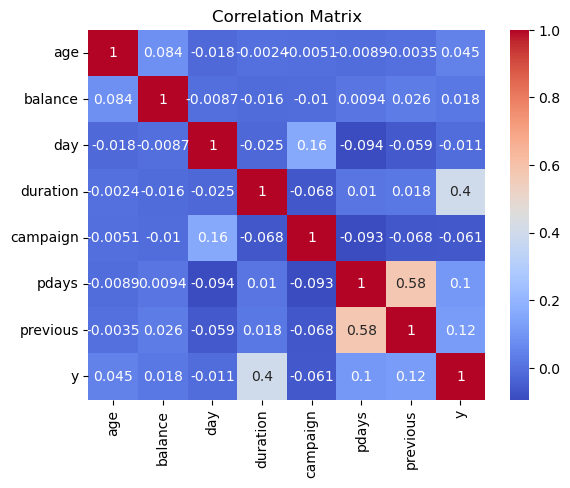

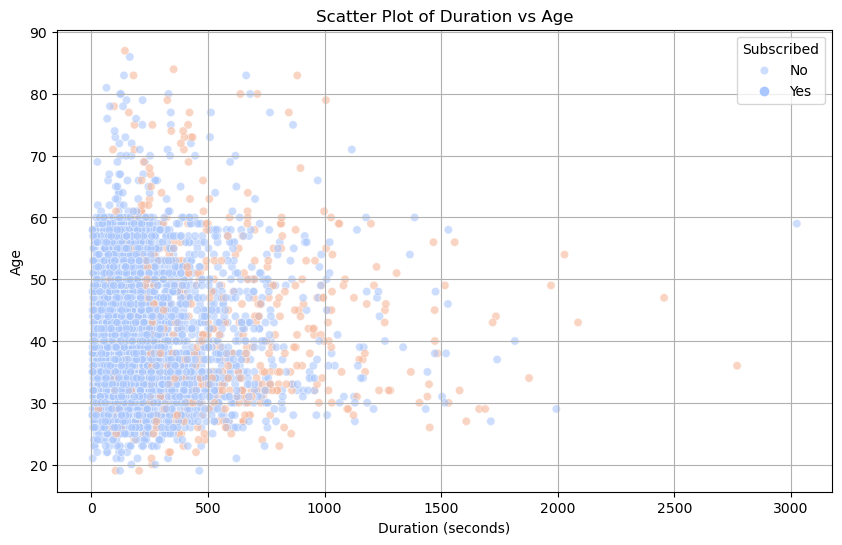

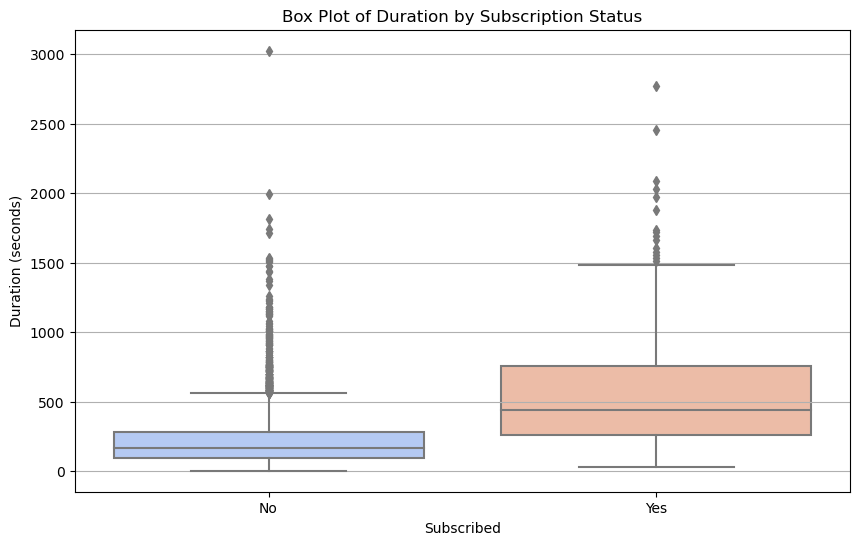

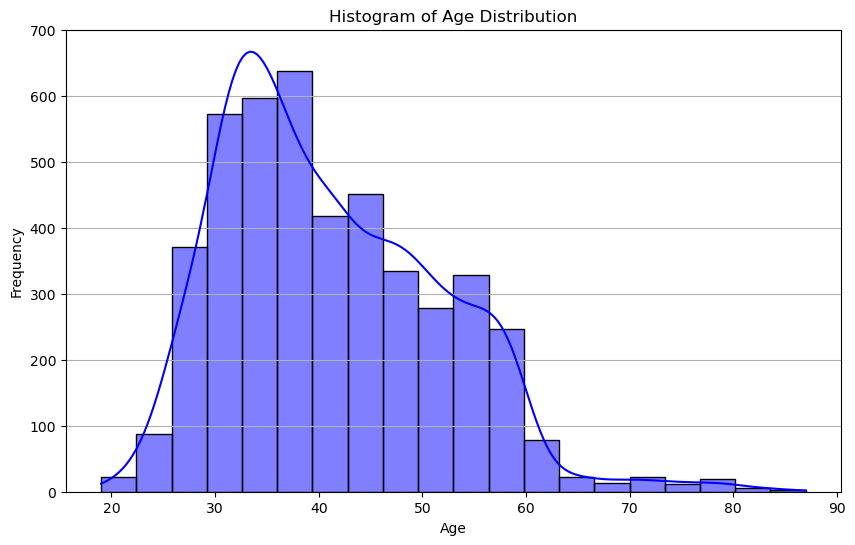

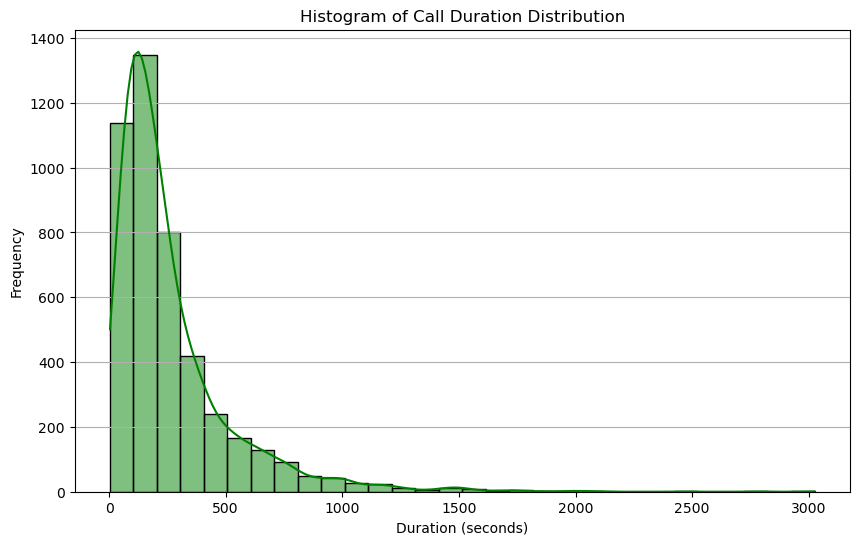

In [27]:
# Data Visualization

# Correlation matrix to check feature relationships
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot: Duration vs Age colored by Subscription Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='duration', y='age', hue='y', palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot of Duration vs Age')
plt.xlabel('Duration (seconds)')
plt.ylabel('Age')
plt.legend(title='Subscribed', loc='upper right', labels=['No', 'Yes'])
plt.grid()
plt.show()

# Box Plot: Duration by Subscription Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='y', y='duration', palette='coolwarm')
plt.title('Box Plot of Duration by Subscription Status')
plt.xlabel('Subscribed')
plt.ylabel('Duration (seconds)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()

# Subscription Rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['age'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Histogram for Duration
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['duration'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Histogram of Call Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


Conclusion

1. Heatmap
This heatmap shows the correlation between different variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). Most variables have weak correlations close to 0, meaning they are not strongly linearly related. The only notable relationship is between pdays and previous, with a moderate positive correlation of 0.58, indicating that these two variables tend to increase together. Overall, the weak correlations suggest minimal linear relationships among most variable pairs.

2. Scatter Plot of Duration vs. Age
Longer call durations appear more likely to result in a subscription, although most calls are short regardless of age.

3. Box Plot of Duration by Subscription Status
Subscriptions are associated with longer call durations on average.

4. Histogram of Age Distribution
The majority of individuals in this dataset are aged 30-40, with fewer older individuals.

5. Histogram of Call Duration Distribution
Most calls are short, with durations concentrated under 500 seconds.

## Machine Learning

In [17]:
# Label encode target variable y
df['y'] = LabelEncoder().fit_transform(df['y'])  # 'no' -> 0, 'yes' -> 1

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Splitting data into features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3164, 71), (1357, 71))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [19]:
from sklearn.ensemble import RandomForestClassifier
# a. Defining the model
rf_model = RandomForestClassifier(random_state=42)

# b. Train the model
rf_model.fit(X_train, y_train)

# c. Predict the test set results
y_pred = rf_model.predict(X_test)

# d. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# e. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# f. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy Score: 0.89
Confusion Matrix:
 [[1180   25]
 [ 120   32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.56      0.21      0.31       152

    accuracy                           0.89      1357
   macro avg       0.73      0.59      0.62      1357
weighted avg       0.87      0.89      0.87      1357



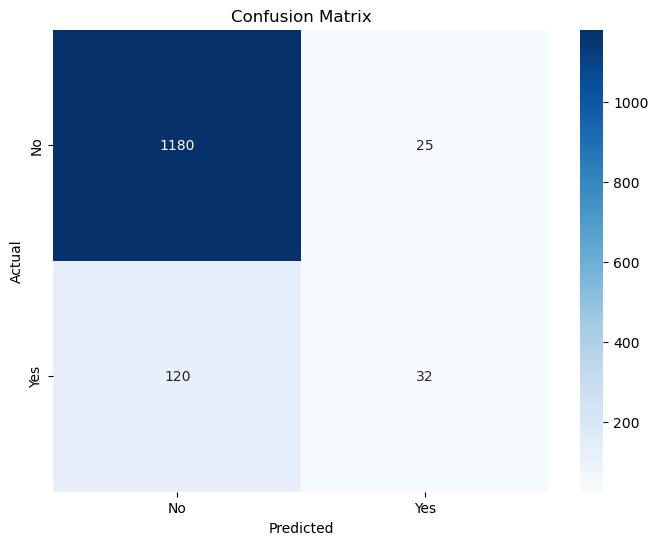

In [20]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Conclusion

The model achieves 89% accuracy, with strong performance in predicting non-subscribers (precision: 0.91, recall: 0.98). However, it struggles to identify subscribers accurately (precision: 0.56, recall: 0.21). The confusion matrix reveals that most errors are false negatives, where subscribers are misclassified as non-subscribers. Overall, the model is effective at identifying non-subscribers but requires improvement for accurately detecting subscribers.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
# a. Defining the model
gb_model = GradientBoostingClassifier(random_state=42)

# b. Train the model
gb_model.fit(X_train, y_train)

# c. Predict the test set results
y_pred = gb_model.predict(X_test)

# d. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# e. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# f. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy Score: 0.90
Confusion Matrix:
 [[1165   40]
 [ 102   50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.56      0.33      0.41       152

    accuracy                           0.90      1357
   macro avg       0.74      0.65      0.68      1357
weighted avg       0.88      0.90      0.88      1357



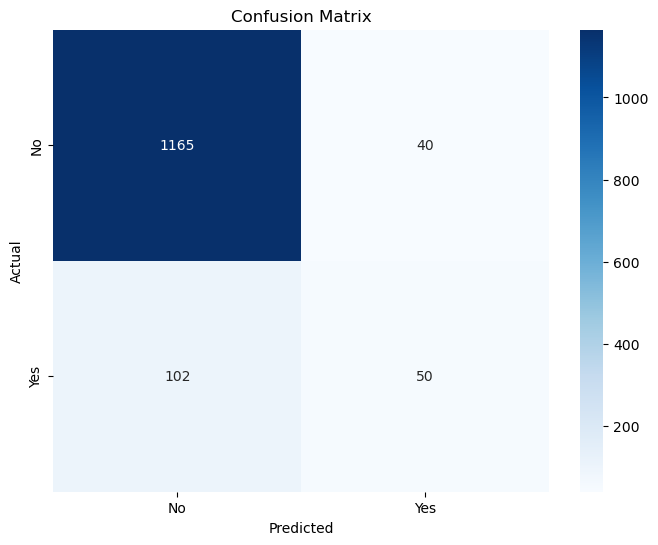

In [23]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Conclusion

The model achieves an accuracy of 90%, with strong performance on the "No" class (precision 0.92, recall 0.97, F1-score 0.94) but weaker results for the "Yes" class (precision 0.56, recall 0.33, F1-score 0.42). The confusion matrix shows 1165 true negatives, 40 false positives, 102 false negatives, and 50 true positives. Overall, the model performs well in predicting "No" but has difficulty identifying "Yes" cases.

OVERALL

When comparing the Random Forest and Gradient Boosting Classifier models, both achieve high overall accuracy—89% for Random Forest and 90% for Gradient Boosting. Both models perform strongly in predicting non-subscribers, with precision and recall close to 0.91-0.92 and 0.97-0.98, indicating high reliability in identifying clients who will not subscribe.

However, both models struggle to accurately detect subscribers. The Random Forest model has lower recall (0.21) for subscribers, resulting in frequent false negatives, while Gradient Boosting slightly improves this recall (0.33) but still has a low F1-score (0.42) for subscribers. The Gradient Boosting model also provides a more detailed confusion matrix, showing fewer false positives but a similar level of difficulty with false negatives, indicating challenges in accurately classifying subscribers.

### Conclusion
Both models excel at identifying non-subscribers, with Gradient Boosting showing a slight edge in accuracy and slightly improved recall for subscribers. However, neither model sufficiently captures subscriber patterns, indicating room for further optimization. Techniques like resampling, feature engineering, or testing additional models could be explored to enhance detection of subscribers while maintaining strong performance for non-subscribers.